<a href="https://colab.research.google.com/github/LiRan2496/deeplearning/blob/master/convolution_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
print(tf.__version__)
import cv2


Using TensorFlow backend.


1.13.1


创建回调函数 当loss损失小于0.4时 在epoch结束后  停止训练

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.4:
      print('\nReached 60% accuracy so cancelling training!')
      self.model.stop_training = True
callback = myCallback()

In [3]:
 fashion_mnist = keras.datasets.mnist
 (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


In [0]:
import matplotlib.pyplot as plt

print(x_train.shape)
print(x_train[0])
# plt.imshow(x_train[0])
print(x_train[0])

# print(y_train[0])


In [0]:
数据预处理： 将每个像素值缩放到 0-1 范围内

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
定义 model模型  需要注意的是在第一层 须声明input_shape， 否则模型识别不了输入层

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=( 28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

In [0]:
model.summary()

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs = 5, callbacks = [callback])

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 499us/step


0.038616994412476194

In [0]:
创建新的模型，这里的Model类 类似于Sequential类，但不同的是 Model类可以有多个输入层和多个输出层
在这里Model模型的输出层 为原始模型的前4个输出层，即卷积的激活层以及池化层 
通过 plt.subplots(3, 4) 定义12个 subplot 对象， 并以以arr的形式返回
绘制每张图像 经过前4个layer的结果 CONVELUTION_NUMBER 选择了过滤某一个通道的结果


(3, 4)


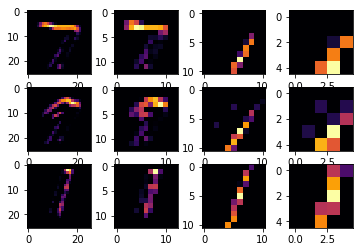

In [10]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
f, axarr = plt.subplots(3,4)
print(axarr.shape)
FIRST_IMAGE = 0
SECOND_IMAGE = 20
THIRD_IMGAE = 2
CONVELUTION_NUMBER = 3
for x in range(4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0][x].imshow(f1[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[0][x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1][x].imshow(f2[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMGAE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
 